# APPENDIX B: alpha, beta, gamma

In [1]:
# IMPORTATIONS
import os
import sys
import time
from numpy import *
from matplotlib.pylab import *
from decimal import Decimal
import pickle
import inspect

import treal_functions
import general_functions
import slopes_functions
import prepare_functions
import fitting as fit
import cuspcore_aux
import cuspcore_plots
import evolving
import cuspcore_go

from general_functions import *
from slopes_functions import *
from prepare_functions import *
from cuspcore_aux import *
from cuspcore_plots import *
from evolving import *

# PARAMETERS
execfile("single_params.py")
directory='/cs/sci/freundlich/CUSPCORE/Michael/'
components=['d']

rmin_evolve=0.01
rmax_evolve=1
constrain_fit=True
constrain_evolution=True
linear_slopes=False
polyorder=2
sigma=21
mode='interp'

execfile("single_initialization.py")
execfile("single_load.py")

print 'Done on %s at %s'%(time.strftime("%x"),time.strftime("%X"))

/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Simulation g1.08e11
 
Loading existing file Treal-1.08e11.pickle
Reducing the range of gl
Reducing the range of Treal
 
Done on 06/17/20 at 15:11:31


In [2]:
# FIGURE PROPERTIES

fontsize=20
legendsize=fontsize
linewidth=2
linesize=5
ticksize=fontsize-4
figsize=(8,16)
figsize=(8,6)

rcParams['axes.linewidth'] = 1
rcParams['xtick.major.size'] = 6
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 3
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 6
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 3
rcParams['ytick.minor.width'] = 1
rcParams['xtick.labelsize'] = fontsize
rcParams['ytick.labelsize'] = fontsize

rcParams['figure.subplot.left']=0.15
rcParams['figure.subplot.right']=0.95
rcParams['figure.subplot.bottom']=0.15
rcParams['figure.subplot.top']=0.95
rcParams['figure.subplot.wspace']=0.1
rcParams['figure.subplot.hspace']=0.1


In [3]:
# COMPARE Kreal and Kvirial

from matplotlib.pylab import *
G = 4.499753324353496e-06 # gravitational constant [kpc^3 Gyr^-2 Msun^-1]

rlim=array([-2.,0.])
component='d'
tmin=2.

parsec=3.085677581e16 #m
year=3.1557600e7 #s
kms_to_kpcGyr=1/parsec*year*1e9


polyorder= 2  sigma= 21 mode= interp
beta_rms= 0.123765562799
beta_mean= 0.0936495470432


(-2.0, 0.0)

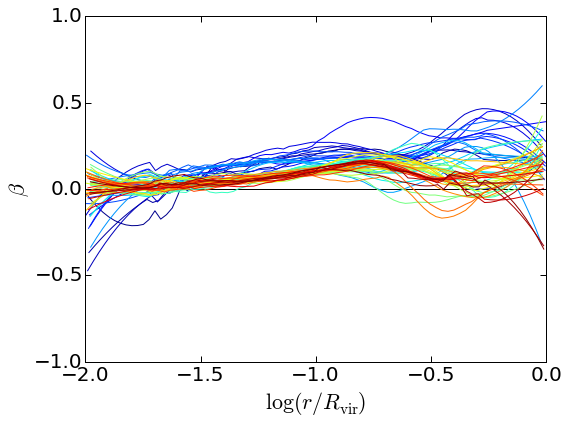

In [4]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

vmin=2.
vmax=gl[-1]['t']
jet = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=vmin, vmax=vmax)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

beta_lim=[-1.,1.]
rlim=[-2.,0.]
component='d'
textfont=20

print "polyorder=",polyorder, ' sigma=',sigma,'mode=',mode

figure(figsize=figsize)

axhline(0,color='k')
xlabel(r'$\log(r/R_{\rm vir})$',fontsize=textfont+2)
ylabel(r'$\beta$',fontsize=textfont+2)

beta_rms=[]
beta_mean=[]
for (ss, i) in zip(gl, range(size(gl))):
    if ss['t']>tmin:
        colorVal = scalarMap.to_rgba(ss['t'])
        plot(log10(ss[component]['r']/ss['Rvir']),ss[component]['beta_smooth'],color=colorVal)#,hold=True)
        beta_rms.append(sqrt(mean(ss[component]['beta_smooth']**2)))
        beta_mean.append(mean(ss[component]['beta_smooth']))

print "beta_rms=",mean(beta_rms)
print "beta_mean=",mean(beta_mean)

ylim(beta_lim[0], beta_lim[1])        
xlim(rlim)


In [5]:
abscisse=log10(logspace(-2,0,1000))

beta_curve=[]
for (ss, i) in zip(gl, range(size(gl))):
    r= ss[component]['r']
    Rvir=ss['Rvir']
    beta=ss[component]['beta_smooth']
    logr=log10(ss[component]['r']/ss['Rvir'])
    t=ss['t']

    if t>tmin:
        beta_curve.append(list(interp(abscisse,logr,beta,left=nan,right=nan)))

beta_curve=array(beta_curve)

beta_min=nan*ones_like(abscisse)
beta_max=nan*ones_like(abscisse)
beta_med=nan*ones_like(abscisse)
beta_rms=nan*ones_like(abscisse)
for i in range(size(abscisse)):
    try:
        beta_min[i]=amin(array_nonan(beta_curve[:,i]))
        beta_max[i]=amax(array_nonan(beta_curve[:,i]))
        beta_med[i]=median((beta_curve[:,i]))
        beta_rms[i]=std((beta_curve[:,i]))
    except:
        continue


/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


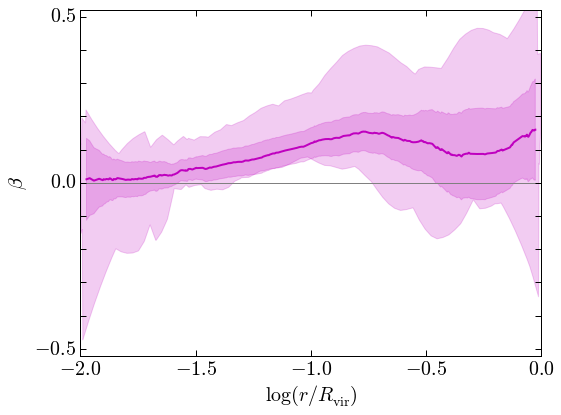

In [6]:
alpha_fill=0.2

fig=figure(figsize=figsize)
clf()

axhline(0,color='gray')

fill_between(abscisse,beta_min,beta_max,color='m',alpha=alpha_fill)
fill_between(abscisse,beta_med-beta_rms,beta_med+beta_rms,color='m',alpha=alpha_fill)
plot(abscisse,beta_med,lw=2,color='m')

xlabel(r'$\log(r/R_{\rm vir})$',fontsize=fontsize)
ylabel(r'$\beta$',fontsize=fontsize)

xticknames=['$%.1f$'%log10(item) for item in logspace(-2,0,5)]
xticks(log10(logspace(-2,0,5)),xticknames,visible=True)

yticknames=['$%.1f$'%log10(item) for item in logspace(-0.5,0.5,11)]
yticknames=['$-0.5$', ' ', ' ', ' ', ' ', '$0.0$', ' ', ' ', ' ', ' ','$0.5$']
yticks(log10(logspace(-0.5,0.5,11)),yticknames,visible=True)

ylim(-.52,.52)
xlim(rlim)

ax=gca()


# PLOT  ALPHA AND GAMMA

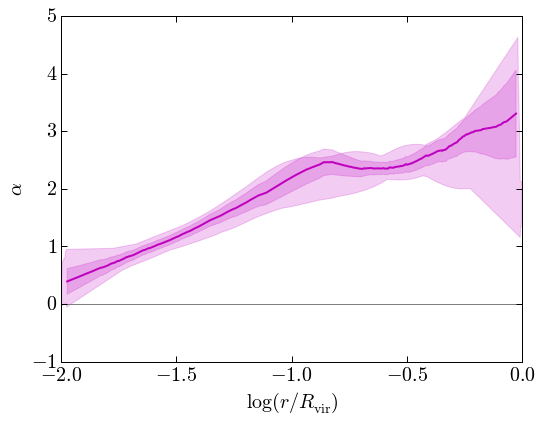

In [7]:
# ALPHA

import matplotlib.colors as colors
import matplotlib.cm as cmx

vmin=2.
vmax=gl[-1]['t']
jet = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=vmin, vmax=vmax)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

alpha_lim=[-1.,1.]
rlim=[-2.,0.]
component='d'
textfont=20

abscisse=log10(logspace(-2,0,1000))

alpha_curve=[]
for (ss, i) in zip(gl, range(size(gl))):
    r= ss[component]['r']
    Rvir=ss['Rvir']
    alpha=ss[component]['alpha']
    logr=log10(ss[component]['r']/ss['Rvir'])
    t=ss['t']

    if t>tmin:
        alpha_curve.append(list(interp(abscisse,logr,alpha,left=nan,right=nan)))

alpha_curve=array(alpha_curve)

alpha_min=nan*ones_like(abscisse)
alpha_max=nan*ones_like(abscisse)
alpha_med=nan*ones_like(abscisse)
alpha_rms=nan*ones_like(abscisse)
for i in range(size(abscisse)):
    try:
        alpha_min[i]=amin(array_nonan(alpha_curve[:,i]))
        alpha_max[i]=amax(array_nonan(alpha_curve[:,i]))
        alpha_med[i]=median((alpha_curve[:,i]))
        alpha_rms[i]=std((alpha_curve[:,i]))
    except:
        continue

################################

alpha_fill=0.2

fig=figure(figsize=figsize)
clf()

axhline(0,color='gray')

fill_between(abscisse,alpha_min,alpha_max,color='m',alpha=alpha_fill)
fill_between(abscisse,alpha_med-alpha_rms,alpha_med+alpha_rms,color='m',alpha=alpha_fill)
plot(abscisse,alpha_med,lw=2,color='m')

xlabel(r'$\log(r/R_{\rm vir})$',fontsize=fontsize)
ylabel(r'$\alpha$',fontsize=fontsize)

xticknames=['$%.1f$'%log10(item) for item in logspace(-2,0,5)]
xticks(log10(logspace(-2,0,5)),xticknames,visible=True)

yticknames=['$%.0f$'%log10(item) for item in logspace(-1,5,7)]
yticks(log10(logspace(-1,5,7)),yticknames,visible=True)

#ylim(-.52,.52)
xlim(rlim)

ax=gca()


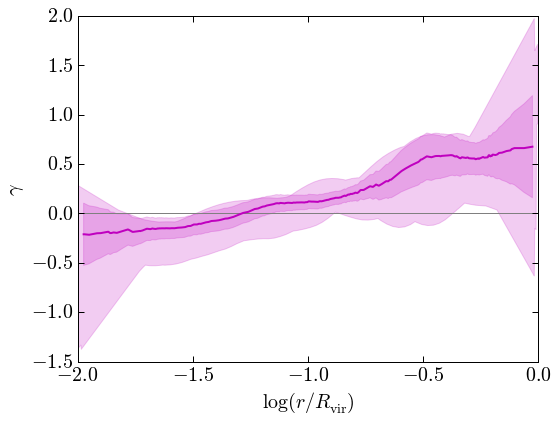

In [8]:
# GAMMA

import matplotlib.colors as colors
import matplotlib.cm as cmx

vmin=2.
vmax=gl[-1]['t']
jet = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=vmin, vmax=vmax)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

gamma_lim=[-1.,1.]
rlim=[-2.,0.]
component='d'
textfont=20

abscisse=log10(logspace(-2,0,1000))

gamma_curve=[]
for (ss, i) in zip(gl, range(size(gl))):
    r= ss[component]['r']
    Rvir=ss['Rvir']
    gamma=ss[component]['gamma']
    logr=log10(ss[component]['r']/ss['Rvir'])
    t=ss['t']

    if t>tmin:
        gamma_curve.append(list(interp(abscisse,logr,gamma,left=nan,right=nan)))

gamma_curve=array(gamma_curve)

gamma_min=nan*ones_like(abscisse)
gamma_max=nan*ones_like(abscisse)
gamma_med=nan*ones_like(abscisse)
gamma_rms=nan*ones_like(abscisse)
for i in range(size(abscisse)):
    try:
        gamma_min[i]=amin(array_nonan(gamma_curve[:,i]))
        gamma_max[i]=amax(array_nonan(gamma_curve[:,i]))
        gamma_med[i]=median((gamma_curve[:,i]))
        gamma_rms[i]=std((gamma_curve[:,i]))
    except:
        continue

################################

alpha_fill=0.2

fig=figure(figsize=figsize)
clf()

axhline(0,color='gray')

fill_between(abscisse,gamma_min,gamma_max,color='m',alpha=alpha_fill)
fill_between(abscisse,gamma_med-gamma_rms,gamma_med+gamma_rms,color='m',alpha=alpha_fill)
plot(abscisse,gamma_med,lw=2,color='m')

xlabel(r'$\log(r/R_{\rm vir})$',fontsize=fontsize)
ylabel(r'$\gamma$',fontsize=fontsize)

xticknames=['$%.1f$'%log10(item) for item in logspace(-2,0,5)]
xticks(log10(logspace(-2,0,5)),xticknames,visible=True)

yticknames=['$%.1f$'%log10(item) for item in logspace(-1.5,2,8)]
yticks(log10(logspace(-1.5,2,8)),yticknames,visible=True)

xlim(rlim)

ax=gca()


# ALPHA AND GAMMA TOGETHER

In [9]:
# FIGURE PROPERTIES

fontsize=20
legendsize=fontsize
linewidth=2
linesize=5
ticksize=fontsize-4
figsize=(8,16)
figsize=(8,12)

rcParams['axes.linewidth'] = 1
rcParams['xtick.major.size'] = 6
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 3
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 6
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 3
rcParams['ytick.minor.width'] = 1
rcParams['xtick.labelsize'] = fontsize
rcParams['ytick.labelsize'] = fontsize

rcParams['figure.subplot.left']=0.15
rcParams['figure.subplot.right']=0.95
rcParams['figure.subplot.bottom']=0.15
rcParams['figure.subplot.top']=0.95
rcParams['figure.subplot.wspace']=0.1
rcParams['figure.subplot.hspace']=0.1

[None, None, None, None, None]

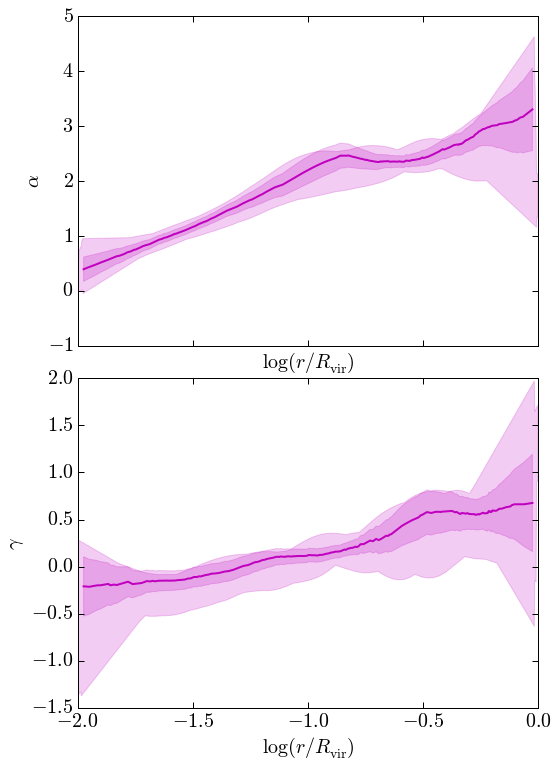

In [10]:
alpha_fill=0.2


fig=figure(figsize=figsize)
clf()

ax1=subplot(211)

fill_between(abscisse,alpha_min,alpha_max,color='m',alpha=alpha_fill)
fill_between(abscisse,alpha_med-alpha_rms,alpha_med+alpha_rms,color='m',alpha=alpha_fill)
plot(abscisse,alpha_med,lw=2,color='m')

xlabel(r'$\log(r/R_{\rm vir})$',fontsize=fontsize)
ylabel(r'$\alpha$',fontsize=fontsize)

xticknames=['$%.1f$'%log10(item) for item in logspace(-2,0,5)]
xticks(log10(logspace(-2,0,5)),xticknames,visible=True)

yticknames=['$%.0f$'%log10(item) for item in logspace(-1,5,7)]
yticks(log10(logspace(-1,5,7)),yticknames,visible=True)

xlim(rlim)

ax2=subplot(212, sharex=ax1)

fill_between(abscisse,gamma_min,gamma_max,color='m',alpha=alpha_fill)
fill_between(abscisse,gamma_med-gamma_rms,gamma_med+gamma_rms,color='m',alpha=alpha_fill)
plot(abscisse,gamma_med,lw=2,color='m')

xlabel(r'$\log(r/R_{\rm vir})$',fontsize=fontsize)
ylabel(r'$\gamma$',fontsize=fontsize)

xticknames=['$%.1f$'%log10(item) for item in logspace(-2,0,5)]
xticks(log10(logspace(-2,0,5)),xticknames,visible=True)

yticknames=['$%.1f$'%log10(item) for item in logspace(-1.5,2,8)]
yticks(log10(logspace(-1.5,2,8)),yticknames,visible=True)

xlim(rlim)

setp(ax1.get_xticklabels(), visible=False)
